In [23]:
# Step 1: Import necessary libraries and load the datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [25]:
df=pd.read_csv(r"/content/calories.csv")
df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [26]:
df1=pd.read_csv(r"/content/exercise.csv")
df1

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [27]:
df = pd.concat([df, df1], axis=1)

In [28]:
df.isnull().sum()


User_ID       0
Calories      0
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [29]:
df = df.dropna()

In [30]:
print(df.describe())


            User_ID      Calories       User_ID           Age        Height  \
count  1.500000e+04  15000.000000  1.500000e+04  15000.000000  15000.000000   
mean   1.497736e+07     89.539533  1.497736e+07     42.789800    174.465133   
std    2.872851e+06     62.456978  2.872851e+06     16.980264     14.258114   
min    1.000116e+07      1.000000  1.000116e+07     20.000000    123.000000   
25%    1.247419e+07     35.000000  1.247419e+07     28.000000    164.000000   
50%    1.499728e+07     79.000000  1.499728e+07     39.000000    175.000000   
75%    1.744928e+07    138.000000  1.744928e+07     56.000000    185.000000   
max    1.999965e+07    314.000000  1.999965e+07     79.000000    222.000000   

             Weight      Duration    Heart_Rate     Body_Temp  
count  15000.000000  15000.000000  15000.000000  15000.000000  
mean      74.966867     15.530600     95.518533     40.025453  
std       15.035657      8.319203      9.583328      0.779230  
min       36.000000      1.00000

In [32]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00


In [34]:
import streamlit as st


In [37]:
df.replace({'male': 0, 'female': 1}, inplace=True)
df.head()

,User_ID,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,14733363,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,14861698,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,11179863,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,16180408,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,17771927,1,27,154.0,58.0,10.0,81.0,39.8


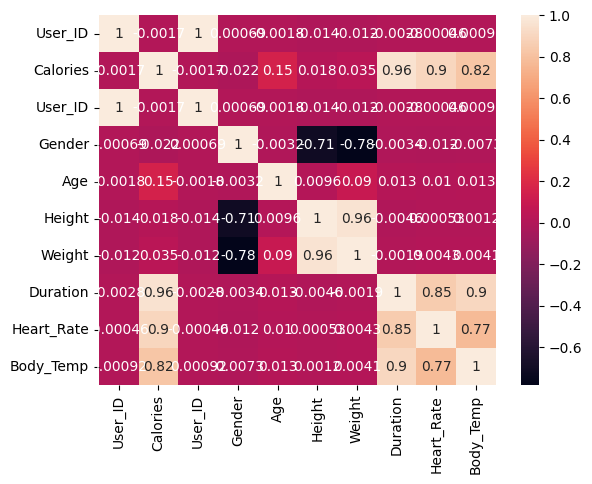

In [39]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [40]:
X = df.drop(columns=['Calories'])
y = df['Calories']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression MSE: 132.06758234066442
Linear Regression R2 Score: 0.9672759152492366


In [44]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest MSE: 8.136212733333334
Random Forest R2 Score: 0.9979839858478741


In [45]:
st.title("Calorie Burn Prediction")

2024-07-22 13:42:41.518 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()